## DATA 422 Group Project - Josie (jst218) - Earthquake data

In [71]:
# Libraries
library(here)
library(tidyverse)
library(sf)
library(glue)
library(geojsonio)
library(dplyr)
library(rgeos)
library(sp)
library(rgdal)


[1] "/Users/josiestockill/Downloads"

## URLs for earthquakes downloads

- https://quakesearch.geonet.org.nz/csv?bbox=163.5205,-49.1817,-176.9238,-32.2871&startdate=2017-03-01&enddate=2017-12-31T7:00:00
- https://quakesearch.geonet.org.nz/csv?bbox=163.5205,-49.1817,-176.9238,-32.2871&startdate=2016-11-01&enddate=2017-03-01
- https://quakesearch.geonet.org.nz/csv?bbox=163.5205,-49.1817,-176.9238,-32.2871&startdate=2015-11-01&enddate=2016-11-01
- https://quakesearch.geonet.org.nz/csv?bbox=163.5205,-49.1817,-176.9238,-32.2871&startdate=2014-11-01&enddate=2015-11-01
- https://quakesearch.geonet.org.nz/csv?bbox=163.5205,-49.1817,-176.9238,-32.2871&startdate=2014-01-01T7:00:00&enddate=2014-11-01

In [78]:
# Read in each of the csv's (there is a 20,000 row limit on the exports from geonet Quake Search)

earthquake1 <- read.csv("https://quakesearch.geonet.org.nz/csv?bbox=163.5205,-49.1817,-176.9238,-32.2871&startdate=2017-03-01&enddate=2017-12-31T7:00:00")
earthquake2 <- read.csv("https://quakesearch.geonet.org.nz/csv?bbox=163.5205,-49.1817,-176.9238,-32.2871&startdate=2016-11-01&enddate=2017-03-01")
earthquake3 <- read.csv("https://quakesearch.geonet.org.nz/csv?bbox=163.5205,-49.1817,-176.9238,-32.2871&startdate=2015-11-01&enddate=2016-11-01")
earthquake4 <- read.csv("https://quakesearch.geonet.org.nz/csv?bbox=163.5205,-49.1817,-176.9238,-32.2871&startdate=2014-11-01&enddate=2015-11-01")
earthquake5 <- read.csv("https://quakesearch.geonet.org.nz/csv?bbox=163.5205,-49.1817,-176.9238,-32.2871&startdate=2014-01-01T7:00:00&enddate=2014-11-01")
  
# Row bind the csv's into one dataframe
quakes <- do.call("rbind", list(earthquake1, earthquake2, earthquake3, earthquake4,earthquake5))


In [79]:
head(quakes)

,publicid,eventtype,origintime,modificationtime,longitude,latitude,magnitude,depth,magnitudetype,depthtype,⋯,evaluationstatus,evaluationmode,earthmodel,usedphasecount,usedstationcount,magnitudestationcount,minimumdistance,azimuthalgap,originerror,magnitudeuncertainty
,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,2017p984556,,2017-12-31T06:51:30.034Z,2017-12-31T06:53:28.344Z,175.0064,-41.39838,1.581007,21.640625,M,,⋯,,automatic,nz3drx,11,11,7,0.10245887,130.07508,0.1787867,0
2,2017p984528,,2017-12-31T06:37:56.519Z,2017-12-31T06:41:02.657Z,175.9204,-38.87388,2.193771,159.687500,M,,⋯,,automatic,nz3drx,37,37,18,0.35726708,189.89333,1.6659082,0
3,2017p984480,,2017-12-31T06:11:04.004Z,2017-12-31T06:12:38.146Z,175.8808,-40.61563,1.588915,25.390625,M,,⋯,,automatic,nz3drx,14,14,8,0.09205309,81.91769,0.2982634,0
4,2017p984181,,2017-12-31T03:31:52.604Z,2017-12-31T03:34:17.625Z,176.0742,-39.27950,2.179969,46.484375,M,,⋯,,automatic,nz3drx,55,55,36,0.21035583,45.83764,0.5727317,0
5,2017p984157,,2017-12-31T03:19:38.237Z,2017-12-31T03:21:40.391Z,177.0645,-39.55705,1.847687,20.468750,M,,⋯,,automatic,nz3drx,12,12,6,0.28505316,195.40885,0.3182329,0
6,2017p984059,,2017-12-31T02:26:53.331Z,2017-12-31T02:28:37.743Z,174.3273,-41.68864,2.106633,9.921875,M,,⋯,,automatic,nz3drx,19,19,8,0.10563158,138.80680,0.4924095,0


## Import shapefile of regional council areas
https://koordinates.com/from/datafinder.stats.govt.nz/layer/106666/download/

Note: Must set the projection to WGS 84

In [76]:
# Important - all other files that come with the .shp file (in the zip download) 
# must be in the same folder as you are calling the .shp file from
# Unzip the download folder and then take all contents to directory you are calling from

regions <- st_read("regional-council-2022-generalised.shp") %>%
           st_transform(crs = 4326)

Reading layer `regional-council-2022-generalised' from data source 
  `/Users/josiestockill/Downloads/regional-council-2022-generalised.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 17 features and 6 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -177.3579 ymin: -47.72405 xmax: 178.8362 ymax: -33.9585
CRS:           4326


In [80]:
# Combine the dataframes 

reg_quakes <- quakes %>%
              st_as_sf(coords= c("longitude", "latitude"), crs=4326) %>%
              st_join(regions)
head(reg_quakes)

publicid    eventtype origintime               modificationtime        
1 2017p984556           2017-12-31T06:51:30.034Z 2017-12-31T06:53:28.344Z
2 2017p984528           2017-12-31T06:37:56.519Z 2017-12-31T06:41:02.657Z
3 2017p984480           2017-12-31T06:11:04.004Z 2017-12-31T06:12:38.146Z
4 2017p984181           2017-12-31T03:31:52.604Z 2017-12-31T03:34:17.625Z
5 2017p984157           2017-12-31T03:19:38.237Z 2017-12-31T03:21:40.391Z
6 2017p984059           2017-12-31T02:26:53.331Z 2017-12-31T02:28:37.743Z
  magnitude depth      magnitudetype depthtype evaluationmethod
1 1.581007   21.640625 M                       NonLinLoc       
2 2.193771  159.687500 M                       NonLinLoc       
3 1.588915   25.390625 M                       NonLinLoc       
4 2.179969   46.484375 M                       NonLinLoc       
5 1.847687   20.468750 M                       NonLinLoc       
6 2.106633    9.921875 M                       NonLinLoc       
  evaluationstatus geometry                   ⋯ azimuthalgap originerror
1                  POINT (175.0064 -41.39838) ⋯ 130.07508    0.1787867  
2                  POINT (175.9204 -38.87388) ⋯ 189.89333    1.6659082  
3                  POINT (175.8808 -40.61563) ⋯  81.91769    0.2982634  
4                  POINT (176.0742 -39.2795)  ⋯  45.83764    0.5727317  
5                  POINT (177.0645 -39.55705) ⋯ 195.40885    0.3182329  
6                  POINT (174.3273 -41.68864) ⋯ 138.80680    0.4924095  
  magnitudeuncertainty REGC2022_V REGC2022_1               
1 0                    09         Wellington Region        
2 0                    03         Waikato Region           
3 0                    08         Manawatū-Whanganui Region
4 0                    08         Manawatū-Whanganui Region
5 0                    06         Hawke's Bay Region       
6 0                    18         Marlborough Region       
  REGC2022_2                LAND_AREA_ AREA_SQ_KM Shape_Leng
1 Wellington Region          8049.438  15945.28    579215.5 
2 Waikato Region            23901.091  34888.83   1268419.8 
3 Manawatu-Whanganui Region 22220.666  25322.21   1176437.1 
4 Manawatu-Whanganui Region 22220.666  25322.21   1176437.1 
5 Hawke's Bay Region        14139.146  21444.17    928781.4 
6 Marlborough Region        10457.792  17688.80    766974.0 
  geometry                  
1 POINT (175.0064 -41.39838)
2 POINT (175.9204 -38.87388)
3 POINT (175.8808 -40.61563)
4 POINT (176.0742 -39.2795) 
5 POINT (177.0645 -39.55705)
6 POINT (174.3273 -41.68864)

In [75]:
# View regions
unique(reg_quakes$REGC2022_1)

[1] Manawatū-Whanganui Region Hawke's Bay Region       
 [3] Marlborough Region        West Coast Region        
 [5] Canterbury Region         Bay of Plenty Region     
 [7] <NA>                      Gisborne Region          
 [9] Waikato Region            Otago Region             
[11] Wellington Region         Southland Region         
[13] Taranaki Region           Tasman Region            
[15] Nelson Region             Auckland Region          
[17] Northland Region         
17 Levels: Area Outside Region Auckland Region ... West Coast Region

In [81]:
# Convert sf.dataframe to dataframe and select columns

reg_quakes <- as.data.frame(reg_quakes)

reg_quakes <- reg_quakes %>%
              select(publicid, origintime, magnitude, depth,REGC2022_2, REGC2022_V)

head(reg_quakes)

,publicid,origintime,magnitude,depth,REGC2022_2,REGC2022_V
,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>
1,2017p984556,2017-12-31T06:51:30.034Z,1.581007,21.640625,Wellington Region,09
2,2017p984528,2017-12-31T06:37:56.519Z,2.193771,159.687500,Waikato Region,03
3,2017p984480,2017-12-31T06:11:04.004Z,1.588915,25.390625,Manawatu-Whanganui Region,08
4,2017p984181,2017-12-31T03:31:52.604Z,2.179969,46.484375,Manawatu-Whanganui Region,08
5,2017p984157,2017-12-31T03:19:38.237Z,1.847687,20.468750,Hawke's Bay Region,06
6,2017p984059,2017-12-31T02:26:53.331Z,2.106633,9.921875,Marlborough Region,18


In [82]:
# Edit date column to be year only

reg_quakes$year = as.numeric(substr(reg_quakes$origintime, 1, 4))

head(reg_quakes)


,publicid,origintime,magnitude,depth,REGC2022_2,REGC2022_V,year
,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>
1,2017p984556,2017-12-31T06:51:30.034Z,1.581007,21.640625,Wellington Region,09,2017
2,2017p984528,2017-12-31T06:37:56.519Z,2.193771,159.687500,Waikato Region,03,2017
3,2017p984480,2017-12-31T06:11:04.004Z,1.588915,25.390625,Manawatu-Whanganui Region,08,2017
4,2017p984181,2017-12-31T03:31:52.604Z,2.179969,46.484375,Manawatu-Whanganui Region,08,2017
5,2017p984157,2017-12-31T03:19:38.237Z,1.847687,20.468750,Hawke's Bay Region,06,2017
6,2017p984059,2017-12-31T02:26:53.331Z,2.106633,9.921875,Marlborough Region,18,2017


In [88]:
# This step is where we can filter by magnitude - I've picked mag < 4

nrow(reg_quakes)

reg_quakes_over4 <- reg_quakes %>%
              filter(magnitude > 4.0)

nrow(reg_quakes_over4)

[1] 102187

[1] 2265

In [89]:
# Aggregate to a regional level and calculate average magnitude for the year (of quakes over 4)

reg_quakes_over4$rownum <- 1

reg_quakes_over4 <- reg_quakes_over4 %>%
                    group_by(year, REGC2022_2, REGC2022_V) %>%
                    summarise(count_quakes = sum(rownum),
                              ave_mag      = mean(magnitude))

reg_quakes_over4

`summarise()` has grouped output by 'year', 'REGC2022_2'. You can override
using the `.groups` argument.


year,REGC2022_2,REGC2022_V,count_quakes,ave_mag
<dbl>,<fct>,<fct>,<dbl>,<dbl>
2014,Bay of Plenty Region,04,7,4.349858
2014,Canterbury Region,13,6,4.275236
2014,Gisborne Region,05,4,4.422094
2014,Hawke's Bay Region,06,8,4.471996
2014,Manawatu-Whanganui Region,08,25,4.471525
2014,Marlborough Region,18,7,4.136728
2014,Otago Region,14,1,4.044708
2014,Southland Region,15,14,4.510727
2014,Tasman Region,16,1,4.196938


In [100]:
# Transform regions to characters

reg_quakes_over4$REGC2022_2 <- as.character(reg_quakes_over4$REGC2022_2)

head(reg_quakes_over4)

year,REGC2022_2,REGC2022_V,count_quakes,ave_mag
<dbl>,<chr>,<fct>,<dbl>,<dbl>
2014,Bay of Plenty Region,04,7,4.349858
2014,Canterbury Region,13,6,4.275236
2014,Gisborne Region,05,4,4.422094
2014,Hawke's Bay Region,06,8,4.471996
2014,Manawatu-Whanganui Region,08,25,4.471525
2014,Marlborough Region,18,7,4.136728


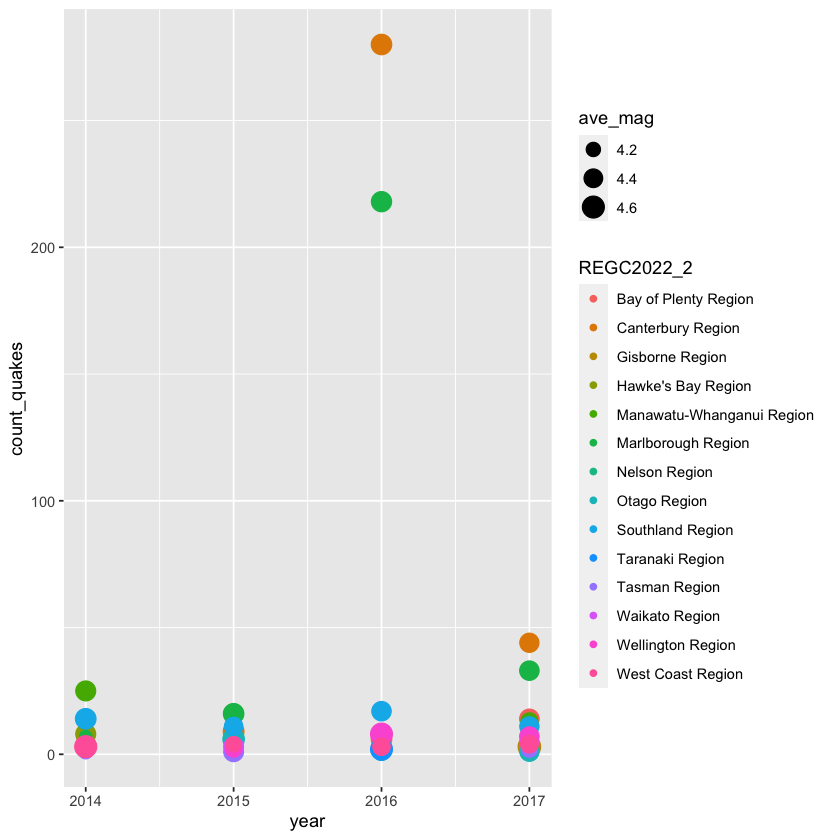

In [102]:
# Quick plot
reg_quakes_over4v2 <- reg_quakes_over4 %>% filter(REGC2022_2 != 'NA')

plot <- ggplot(reg_quakes_over4v2,
               aes(x=year, y=count_quakes, colour=REGC2022_2,
                  size=ave_mag)) + geom_point()
plot

There are two big outliers, lets exclude them to see the other points in detail

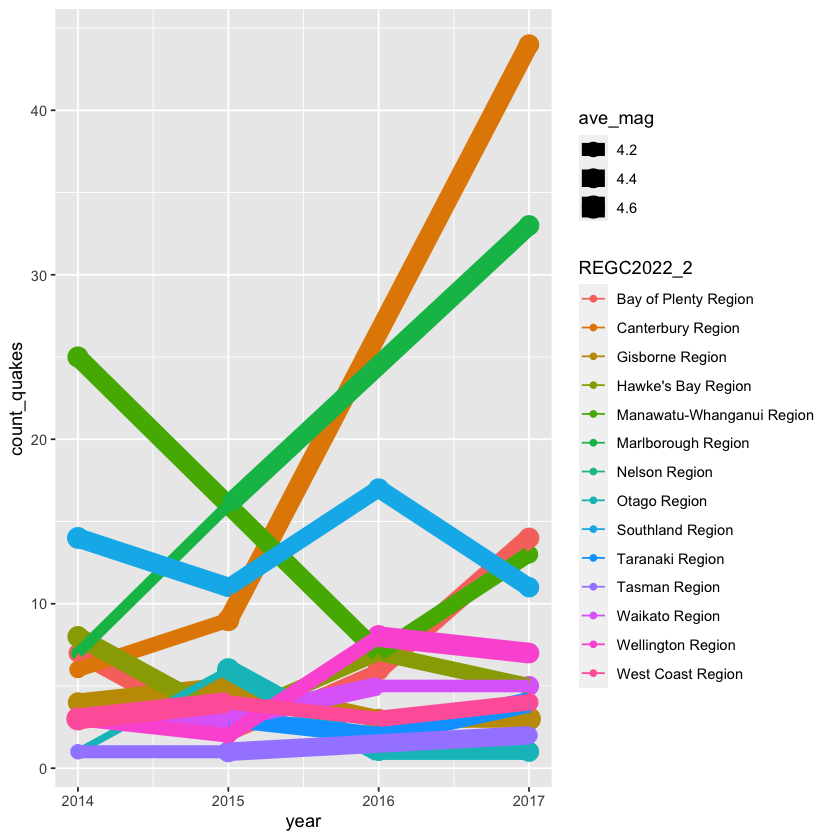

In [104]:
# Quick plot #2
reg_quakes_over4v3 <- reg_quakes_over4v2 %>% filter(count_quakes < 100)

plot2 <- ggplot(reg_quakes_over4v3,
               aes(x=year, y=count_quakes, colour=REGC2022_2,
                  size=ave_mag)) + geom_point() + geom_line()
plot2